# Descarga de históricos de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

> Entonces, en la clase anterior vimos que podemos caracterizar la distribución de rendimientos de un activo mediante una medida de tendencia central (media: rendimiento esperado) y una medida de dispersión (desviación estándar: volatilidad). 

> Estas medidas se pueden calcular cuando tenemos escenarios probables de la economía y conocemos sus probabilidades de ocurrencia. Ahora, si no conocemos dichos escenarios, ¿qué podemos hacer?

*Objetivos:*
- Aprender a importar datos desde archivos separados por comas y de excel (extensión `.csv` y `.xlsx`).
- Descargar el paquete `pandas-datareader`.
- Aprender a descargar datos desde fuentes remotas.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/

## 1. Importar datos desde archivos locales

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Microsoft_Excel_2013_logo.svg" width="300px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="125px" />

### 1.1. ¿Porqué?

- Muchas veces tenemos bases de datos proporcionadas como archivos locales.
- Para poder analizar, procesar y tomar decisiones con estos datos, es necesario importarlos a python.
- Ejemplos de archivos donde comúnmente se guardan bases de datos son: 
 - `.xls` o `.xlsx`
 -  `.csv`
- Excel es ampliamente usado en distintos campos de aplicación en todo el mundo.
- Nos guste o no, esto también aplica a ciencia de datos (ingeniería financiera).
- Muchos de ustedes en su futuro académico y profesional tendrán que trabajar con estas hojas de cálculo, pero no siempre querrán trabajar directamente con ellas si tienen que hacer un análisis un poco más avanzado de los datos.
- Por eso en Python se han implementado herramientas para leer, escribir y manipular este tipo de archivos.

En esta clase veremos cómo podemos trabajar con Excel y Python de manera básica utilizando la librería *pandas*.

### 1.2. Reglas básicas para antes de leer hojas de cálculo

Antes de comenzar a leer una hoja de cálculo en Python (o cualquier otro programa), debemos considerar el ajustar nuestro archivo para cumplir ciertos principios, como:

- La primer fila de la hoja de cálculo se reserva para los títulos, mientras que la primer columna se usa para identificar la unidad de muestreo o indización de los datos (tiempo, fecha, eventos...)
- Evitar nombres, valores o campos con espacios en blanco. De otra manera, cada palabra se interpreta como variable separada y resultan errores relacionados con el número de elementos por línea.
- Los nombres cortos se prefieren sobre nombre largos.
- Evite símbolos como ?, $, %, ^, &, *, (,),-,#, ?, ,,<,>, /, |, \, [ ,] , {, y }.
- Borre cualquier tipo de comentario que haya hecho en su archivo para evitar columnas extras.
- Asegúrese de que cualquier valor inexistente esté indicado como NA.

Si se hizo algún cambio, estar seguro de guardarlo. 

Si estás trabajando con Microsoft Excel, verás que hay muchas opciones para guardar archivos, a parte de las extensiones por defecto .xls or .xlsx. Para esto ir a “Save As” y seleccionar una de las extensiones listadas en “Save as Type”. 

La extensión más común es .csv (archivos de texto separados por comas).

**Actividad.** Descargar precios de acciones de Apple (AAPL) de Yahoo Finance, con una ventana de tiempo desde el 01-01-2015 a hoy y frecuencia diaria.

- Ir a https://finance.yahoo.com/.
- Buscar cada una de las compañías solicitadas.
- Dar click en la pestaña *'Historical Data'*.
- Cambiar las fechas en *'Time Period'*, click en *'Apply'* y, finalmente, click en *'Download Data'*.
- **¡POR FAVOR! GUARDAR ESTOS ARCHIVOS EN UNA CARPETA LLAMADA precios EN EL MISMO DIRECTORIO DONDE TIENEN ESTE ARCHIVO**.

### 1.3. Carguemos archivos .csv como ventanas de datos de pandas

Ahora podemos comenzar a importar nuestros archivos.

Una de las formas más comunes de trabajar con análisis de datos es en pandas. Esto es debido a que pandas está construido sobre NumPy y provee estructuras de datos y herramientas de análisis fáciles de usar.

In [1]:
# Importamos pandas
import pandas as pd

Para leer archivos `.csv`, utilizaremos la función `read_csv` de pandas:

In [8]:
# Cargamos hoja de calculo en un dataframe
nflx = pd.read_csv("precios/NFLX.csv")

In [9]:
nflx

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-25,96.379997,98.250000,96.040001,97.320000,97.320000,10823100
1,2016-08-26,97.330002,97.949997,96.570000,97.580002,97.580002,6617600
2,2016-08-29,96.970001,98.449997,96.570000,97.300003,97.300003,8008400
3,2016-08-30,97.839996,98.849998,97.139999,97.449997,97.449997,6093500
4,2016-08-31,97.480003,97.879997,96.760002,97.449997,97.449997,4690600
...,...,...,...,...,...,...,...
1253,2021-08-18,520.000000,526.380005,518.650024,521.869995,521.869995,2582000
1254,2021-08-19,522.739990,548.390015,521.869995,543.710022,543.710022,7497300
1255,2021-08-20,545.090027,551.390015,539.099976,546.880005,546.880005,3774300
1256,2021-08-23,545.979980,555.549988,543.739990,553.330017,553.330017,2602000


#### Anotación #1
- Quisieramos indizar por fecha.

In [10]:
# Cargamos hoja de calculo en un dataframe
nflx.set_index("Date", inplace=True)

In [11]:
nflx

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-25,96.379997,98.250000,96.040001,97.320000,97.320000,10823100
2016-08-26,97.330002,97.949997,96.570000,97.580002,97.580002,6617600
2016-08-29,96.970001,98.449997,96.570000,97.300003,97.300003,8008400
2016-08-30,97.839996,98.849998,97.139999,97.449997,97.449997,6093500
2016-08-31,97.480003,97.879997,96.760002,97.449997,97.449997,4690600
...,...,...,...,...,...,...
2021-08-18,520.000000,526.380005,518.650024,521.869995,521.869995,2582000
2021-08-19,522.739990,548.390015,521.869995,543.710022,543.710022,7497300
2021-08-20,545.090027,551.390015,539.099976,546.880005,546.880005,3774300


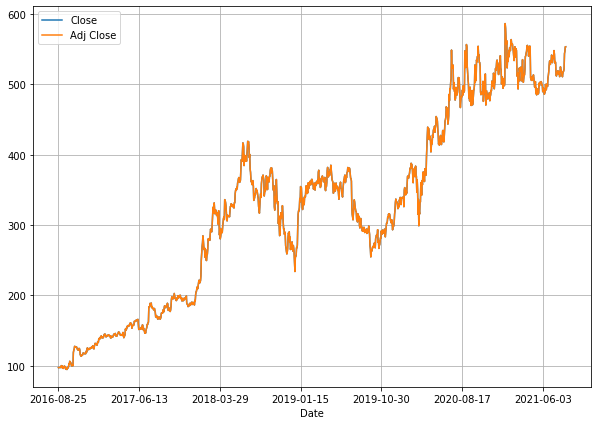

In [14]:
# Graficar precios de cierre y precios de cierre ajustados
nflx[["Close", "Adj Close"]].plot(figsize=(10, 7),
                                  grid=True)

#### Anotación #2
- Para nuestra aplicación solo nos interesan los precios de cierre de las acciones (columna Adj Close).

In [15]:
# Cargamos hoja de calculo en un dataframe
nflx = pd.read_csv("precios/NFLX.csv", 
                   index_col="Date", 
                   usecols=["Date", "Adj Close"])

In [16]:
nflx

,Adj Close
Date,
2016-08-25,97.320000
2016-08-26,97.580002
2016-08-29,97.300003
2016-08-30,97.449997
2016-08-31,97.449997
...,...
2021-08-18,521.869995
2021-08-19,543.710022
2021-08-20,546.880005


**Vamos ahora a importar el archivo que descargamos de factset**

In [17]:
# Usamos la función read_excel de pandas
pd.read_excel?

In [22]:
# Lectura de datos
closes = pd.read_excel("precios/PriceHistory.xlsx",
                       sheet_name="Price History",
                       header=2,
                       index_col="Date")

In [23]:
closes

,Composite,Alphabet Inc. Class C (GOOG-US),Vanguard S&P 500 ETF (VOO-US),Tesla Inc (TSLA-US),"Netflix, Inc. (NFLX-US)",Apple Inc. (AAPL-US)
Date,,,,,,
2021-08-25,514.054570,2859.00,412.63,711.200000,547.58,148.3600
2021-08-24,516.004400,2847.97,411.87,708.490000,553.41,149.6200
2021-08-23,514.915950,2821.99,411.22,706.300000,553.33,149.7100
2021-08-20,506.767120,2768.74,407.61,680.260000,546.88,148.1900
2021-08-19,501.733760,2738.27,404.41,673.470000,543.71,146.7000
...,...,...,...,...,...,...
2016-08-31,99.015790,767.05,199.52,42.402004,97.45,26.5250
2016-08-30,99.056274,769.09,200.01,42.268000,97.45,26.5000
2016-08-29,99.656820,772.15,200.39,43.040005,97.30,26.7050


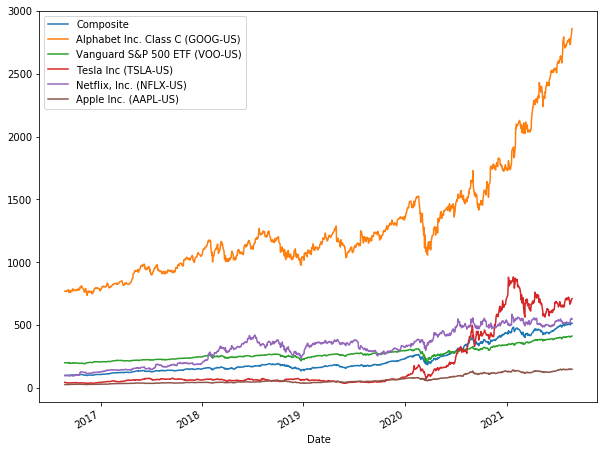

In [24]:
closes.plot(figsize=(10, 8))

## 2. Descargar los datos remotamente
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [25]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
from pandas_datareader import data as web

El módulo data del paquete pandas_datareader contiene la funcion `DataReader`:

In [30]:
# Función DataReader
web.DataReader?

- A esta función le podemos especificar la fuente de los datos para que se use la api específica para la descarga de datos de cada fuente.
- Fuentes:
 - Google Finance: su api ya no sirve.
 - Quandl: necesita registrarse para obtener un api key.
 - IEX: los datos tienen antiguedad máxima de 5 años y de equities estadounidenses.
 - Yahoo! Finance: su api ha tenido cambios significativos y ya no es posible usarla desde DataReader. Sin embargo permite obtener datos de distintas bolsas (incluida la mexicana), por eso le haremos la luchita.

In [27]:
# Ejemplo yahoo
closes2 = web.DataReader(name=["NFLX", "AAPL", "TSLA", "VOO"],
                         data_source="yahoo",
                         start="2016-08-25",
                         end="2021-08-25")

In [29]:
# Precios ajustados en el cierre
closes2["Adj Close"]

Symbols,NFLX,AAPL,TSLA,VOO
Date,,,,
2016-08-25,97.320000,25.220877,44.192001,181.767075
2016-08-26,97.580002,25.073166,43.998001,181.421326
2016-08-29,97.300003,25.045031,43.040001,182.340317
2016-08-30,97.449997,24.852774,42.268002,181.994522
2016-08-31,97.449997,24.876219,42.402000,181.548660
...,...,...,...,...
2021-08-19,543.710022,146.699997,673.469971,404.410004
2021-08-20,546.880005,148.190002,680.260010,407.609985
2021-08-23,553.330017,149.710007,706.299988,411.220001


In [31]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

**Nota**: Para descargar datos de la bolsa mexicana de valores (BMV), el ticker debe tener la extensión MX. 
Por ejemplo: *MEXCHEM.MX*, *LABB.MX*, *GFINBURO.MX* y *GFNORTEO.MX*.

In [33]:
# Ejemplo: MEXCHEM.MX, LABB.MX, GFINBURO.MX y GFNORTEO.MX
closes = get_adj_closes(tickers=["GAPB.MX", "LABB.MX", "GFINBURO.MX", "GFNORTEO.MX"],
                        start_date="2015-01-01")

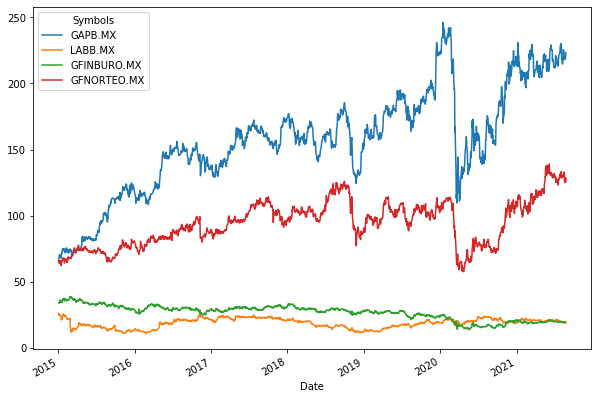

In [34]:
# Gráfico
closes.plot(figsize=(10, 7))

**Conclusión**
- Aprendimos a importar datos desde archivos locales.
- Aprendimos a importar datos remotamente con el paquete pandas_datareader.

¿Ahora qué? Pues con estos históricos, obtendremos los rendimientos y ellos nos servirán como base para caracterizar la distribución de rendimientos... 

### ¡Oh, si!

# Anuncios parroquiales
## 1. Tanto las clases como los quices comienzan a las 20:05. Las clases terminan a las 21:45.
## 2. Los quices tendrán una duración de 20 minuntos, y serán de 6 preguntas.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>